# EDA - Exploratory Data Analysis

In this notebook, we will import data and do some simple data analysis like word-clouds

A high-level verbal description of your data:

The "scientific_lay_summarisation" dataset targets simplifying biomedical research articles into summaries understandable to non-specialists. It's part of a project to democratize access to scientific findings, featuring articles from PLOS and eLife journals. The dataset includes the full text of articles, section titles, keywords, article titles, publication years, and non-technical summaries. With 850.44 MB of dataset files, expanding to 1.32 GB upon generation.

In [2]:
# required libraries: nltk, pandas, numpy, wordcloud, matplotlib
# !pip install wordcloud
# !pip install matplotlib

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [2]:
# high level inspection
file_path = "./data/biolaysumm2024_data/"
file_names = ["eLife_train.jsonl", "eLife_val.jsonl", "eLife_test.jsonl",
              "PLOS_train.jsonl", "PLOS_val.jsonl", "PLOS_test.jsonl"
             ]

print("High level data inspection:")
print("=============================")
for filename in file_names:
    print("Processing file =", filename)
    df = pd.read_json(file_path+filename,
                       orient="records",
                       lines=True)
    print("Number of records =", len(df))
    
    # split by space for simple word count
    print("Counting words...")
    df["article_n_word"] = df["article"].apply(lambda text: len(text.split(" ")))
    if "lay_summary" in df.columns:
        df["summary_n_word"] = df["lay_summary"].apply(lambda text: len(text.split(" ")))
        print("Overall description =\n", df[["article_n_word", "summary_n_word"]].describe())
    else:
        print("Overall description =\n", df[["article_n_word"]].describe())

    # print a sample row
    k = 100
    item = df.iloc[k]
    print(f"Item {k}:")
    print(item)
    print("-----------------------------------------")

print("======= completed ========")

High level data inspection:
Processing file = eLife_train.jsonl
Number of records = 4346
Counting words...
Overall description =
        article_n_word  summary_n_word
count     4346.000000     4346.000000
mean     10159.277957      382.266222
std       3462.903717       64.334356
min        322.000000      177.000000
25%       7791.000000      338.000000
50%       9837.500000      379.000000
75%      12227.250000      423.000000
max      28308.000000      686.000000
Item 100:
lay_summary       Between birth and puberty , the bones of mamma...
article           Activating mutations in fibroblast growth fact...
headings          [Abstract, Introduction, Results, Discussion, ...
keywords                                    [developmental biology]
id                                                   elife-31343-v2
article_n_word                                                 6109
summary_n_word                                                  406
Name: 100, dtype: object
-----------------

# EDA - Exploratory Data Analysis - eLife

In [3]:
filename = "./data/biolaysumm2024_data/eLife_train.jsonl"
train_df = pd.read_json(filename,
                       orient="records",
                       lines=True)
train_df.head()

,lay_summary,article,headings,keywords,id
0,"In the USA , more deaths happen in the winter ...","In temperate climates , winter deaths exceed s...","[Abstract, Introduction, Results, Discussion, ...",[epidemiology and global health],elife-35500-v1
1,Most people have likely experienced the discom...,Whether complement dysregulation directly cont...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology and infectious disease, immunolo...",elife-48378-v2
2,The immune system protects an individual from ...,Variation in the presentation of hereditary im...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology and infectious disease, immunolo...",elife-04494-v1
3,The brain adapts to control our behavior in di...,Rapid and flexible interpretation of conflicti...,"[Abstract, Introduction, Results, Discussion, ...",[neuroscience],elife-12352-v2
4,Cells use motor proteins that to move organell...,Myosin 5a is a dual-headed molecular motor tha...,"[Abstract, Introduction, Results, Discussion, ...",[structural biology and molecular biophysics],elife-05413-v2


In [4]:
train_df.describe()

,lay_summary,article,headings,keywords,id
count,4346,4346,4346,4346,4346
unique,4346,4346,105,296,4346
top,"In the USA , more deaths happen in the winter ...","In temperate climates , winter deaths exceed s...","[Abstract, Introduction, Results, Discussion, ...",[neuroscience],elife-35500-v1
freq,1,1,3484,753,1


In [5]:
item = train_df.iloc[0]

In [6]:
item

lay_summary    In the USA , more deaths happen in the winter ...
article        In temperate climates , winter deaths exceed s...
headings       [Abstract, Introduction, Results, Discussion, ...
keywords                        [epidemiology and global health]
id                                                elife-35500-v1
Name: 0, dtype: object

In [7]:
# take a look at the article (full text, domain-specific language)
print(f"Article len = {len(word_tokenize(item.article)):,} words")
item.article[:500]

Article len = 3,093 words


'In temperate climates , winter deaths exceed summer ones . However , there is limited information on the timing and the relative magnitudes of maximum and minimum mortality , by local climate , age group , sex and medical cause of death . We used geo-coded mortality data and wavelets to analyse the seasonality of mortality by age group and sex from 1980 to 2016 in the USA and its subnational climatic regions . Death rates in men and women ≥ 45 years peaked in December to February and were lowest'

In [8]:
# take a look at the lay summary (shorter, normal language)
print(f"Lay summary len = {len(word_tokenize(item.lay_summary)):,} words")
item.lay_summary[:500]

Lay summary len = 357 words


'In the USA , more deaths happen in the winter than the summer . But when deaths occur varies greatly by sex , age , cause of death , and possibly region . Seasonal differences in death rates can change over time due to changes in factors that cause disease or affect treatment . Analyzing the seasonality of deaths can help scientists determine whether interventions to minimize deaths during a certain time of year are needed , or whether existing ones are effective . Scrutinizing seasonal patterns'

In [9]:
n = len(train_df)
print("Number of rows =", n)
max_row = 1000 # for dev debug, set to n for full set

train_df_sample = train_df.sample(n=max_row) # take a random sample of the data for faster EDA
print("New number of rows =", len(train_df_sample))

Number of rows = 4346
New number of rows = 1000


In [10]:
# make word counter for article and lay_summary

train_df_sample["article_token_count"] = train_df_sample.article.apply(lambda txt: len(txt.split(" ")))
train_df_sample["summary_token_count"] = train_df_sample.lay_summary.apply(lambda txt: len(txt.split(" ")))

train_df_sample.head()

,lay_summary,article,headings,keywords,id,article_token_count,summary_token_count
3658,Schistosomiasis is a devastating disease that ...,Schistosomes infect more than 200 million peop...,"[Abstract, Introduction, Results, Discussion, ...","[developmental biology, microbiology and infec...",elife-33221-v3,10205,322
3005,Plants produce a vast variety of different mol...,Plants produce phylogenetically and spatially ...,"[Abstract, Introduction, Results, Discussion, ...","[plant biology, biochemistry and chemical biol...",elife-56717-v2,10154,376
781,Social animals that live in groups often have ...,"In many species , within-group conflict leads ...","[Abstract, Introduction, Results, Discussion, ...","[ecology, evolutionary biology]",elife-69196-v1,8437,419
1821,Dengue is a viral infection spread by mosquito...,"Recently , a prototype dengue early warning sy...","[Abstract, Introduction, Results, Discussion, ...","[epidemiology and global health, microbiology ...",elife-11285-v1,6750,345
2291,The genetic information of a cell is stored in...,Chromosome alignment in the middle of the bipo...,"[Abstract, Introduction, Results, Discussion, ...",[cell biology],elife-05124-v2,11531,358


In [11]:
train_df_sample[['article_token_count', 'summary_token_count']].describe()

,article_token_count,summary_token_count
count,1000.000000,1000.000000
mean,10221.249000,380.216000
std,3496.204555,64.567703
min,956.000000,204.000000
25%,7872.750000,337.000000
50%,10015.000000,377.000000
75%,12238.500000,419.000000
max,26616.000000,620.000000


In [12]:
# confirm these numbers
print("Article avg word count =", np.average(train_df_sample.article_token_count))
print("Summary avg word count =", np.average(train_df_sample.summary_token_count))

Article avg word count = 10221.249
Summary avg word count = 380.216


## Word-clouds

We are making some word clouds to see the overall frequent words

In [13]:
stopwords_en = stopwords.words("english")

In [14]:
def make_word_cloud(df=train_df, text_col="article", bigrams = True, bigram_threshold=30):
    """
        Create wordcloud to see which dish names appear frequently
        Parameters:
            restaurant_type: "ch" or "en". None to create wordcloud in general
    """
    text = df[text_col] # build wordcloud for entire dataset
        
    print("Text counts = ", len(text))
    # print(text[0])
    text = " ".join(text)
    wcld = WordCloud(stopwords=stopwords_en, 
                     collocations=bigrams,
                     collocation_threshold=bigram_threshold
                    )
    wordcloud = wcld.generate(text)

    
    # show wordcloud
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    # process text, sort by word count and get top words
    w_counter = wcld.process_text(text)
    result = sorted(w_counter.items(),
                    key=lambda item: item[1],
                    reverse=True)

    # print(result)
    return result

In [15]:
# flatten keywords list -> string, replace " " -> "_" for compound words
train_df_sample["keywords_flat"] = train_df_sample.keywords.apply(lambda words: " ".join([w.replace(" ", "_") 
                                                                                          for w in words
                                                                                         ]))
train_df_sample.head()

,lay_summary,article,headings,keywords,id,article_token_count,summary_token_count,keywords_flat
3658,Schistosomiasis is a devastating disease that ...,Schistosomes infect more than 200 million peop...,"[Abstract, Introduction, Results, Discussion, ...","[developmental biology, microbiology and infec...",elife-33221-v3,10205,322,developmental_biology microbiology_and_infecti...
3005,Plants produce a vast variety of different mol...,Plants produce phylogenetically and spatially ...,"[Abstract, Introduction, Results, Discussion, ...","[plant biology, biochemistry and chemical biol...",elife-56717-v2,10154,376,plant_biology biochemistry_and_chemical_biology
781,Social animals that live in groups often have ...,"In many species , within-group conflict leads ...","[Abstract, Introduction, Results, Discussion, ...","[ecology, evolutionary biology]",elife-69196-v1,8437,419,ecology evolutionary_biology
1821,Dengue is a viral infection spread by mosquito...,"Recently , a prototype dengue early warning sy...","[Abstract, Introduction, Results, Discussion, ...","[epidemiology and global health, microbiology ...",elife-11285-v1,6750,345,epidemiology_and_global_health microbiology_an...
2291,The genetic information of a cell is stored in...,Chromosome alignment in the middle of the bipo...,"[Abstract, Introduction, Results, Discussion, ...",[cell biology],elife-05124-v2,11531,358,cell_biology


Text counts =  1000


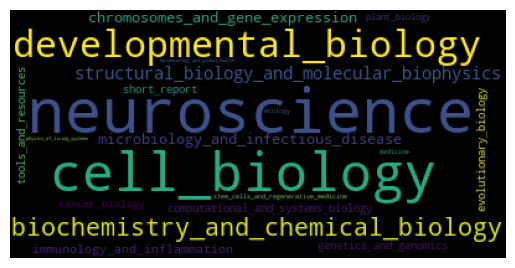

[('neuroscience', 290),
 ('cell biology', 212),
 ('developmental biology', 126),
 ('biochemistry and chemical biology', 123),
 ('structural biology and molecular biophysics', 106),
 ('microbiology and infectious disease', 101),
 ('chromosomes and gene expression', 94),
 ('immunology and inflammation', 70),
 ('computational and systems biology', 65),
 ('genetics and genomics', 58),
 ('evolutionary biology', 55),
 ('short report', 54),
 ('tools and resources', 53),
 ('cancer biology', 46),
 ('plant biology', 35),
 ('stem cells and regenerative medicine', 35),
 ('ecology', 31),
 ('medicine', 29),
 ('physics of living systems', 23),
 ('epidemiology and global health', 21),
 ('research communication', 1)]

In [16]:
top_words_keyword = make_word_cloud(df=train_df_sample, text_col="keywords_flat", bigrams=False)
# convert "_" back to " " for better readability 
top_words_keyword = [(w.replace("_", " "), count)
                     for w, count in top_words_keyword
                    ]
top_words_keyword[:50]


Text counts =  1000


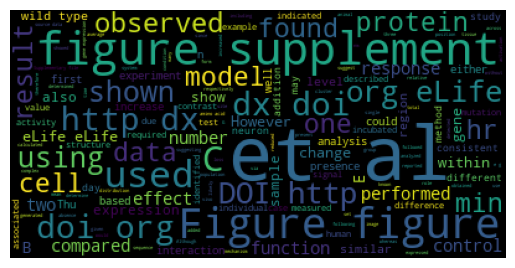

[('et al', 83320),
 ('figure supplement', 20172),
 ('Figure figure', 16603),
 ('used', 13112),
 ('C', 11322),
 ('doi org', 9310),
 ('dx doi', 9294),
 ('http dx', 9288),
 ('org eLife', 9275),
 ('DOI http', 9004),
 ('shown', 8061),
 ('using', 7870),
 ('observed', 7188),
 ('protein', 6791),
 ('cell', 6553),
 ('model', 6466),
 ('found', 6383),
 ('hr', 6158),
 ('min', 6108),
 ('one', 5883),
 ('result', 5883),
 ('data', 5633),
 ('performed', 5633),
 ('effect', 5603),
 ('function', 5578),
 ('compared', 5439),
 ('number', 5361),
 ('response', 5316),
 ('control', 5296),
 ('two', 5291),
 ('eLife eLife', 5167),
 ('B', 5118),
 ('within', 5011),
 ('gene', 4874),
 ('However', 4677),
 ('change', 4650),
 ('E', 4600),
 ('expression', 4548),
 ('also', 4518),
 ('show', 4504),
 ('sample', 4476),
 ('wild type', 4416),
 ('level', 4336),
 ('region', 4313),
 ('similar', 4306),
 ('experiment', 4297),
 ('well', 4130),
 ('presence', 4089),
 ('analysis', 4075),
 ('Thu', 3988)]

In [17]:
# WARNING: LONG PROCESS (a few minutes)
top_words_atc = make_word_cloud(df=train_df_sample, text_col="article", bigram_threshold=20)
top_words_atc[:50]

Text counts =  1000


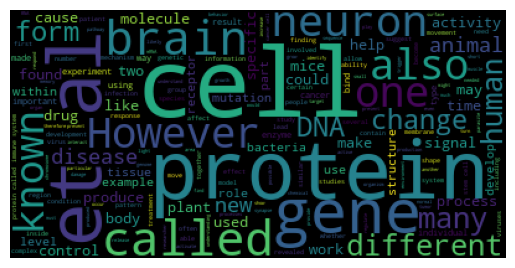

[('cell', 3425),
 ('protein', 2353),
 ('et al', 1942),
 ('gene', 1368),
 ('called', 1032),
 ('brain', 986),
 ('neuron', 824),
 ('However', 797),
 ('one', 788),
 ('also', 781),
 ('known', 743),
 ('different', 721),
 ('human', 709),
 ('many', 691),
 ('change', 659),
 ('DNA', 654),
 ('form', 645),
 ('disease', 612),
 ('animal', 583),
 ('new', 572),
 ('activity', 557),
 ('used', 550),
 ('make', 541),
 ('could', 536),
 ('two', 532),
 ('mice', 509),
 ('molecule', 508),
 ('may', 492),
 ('control', 474),
 ('found', 453),
 ('work', 449),
 ('body', 431),
 ('drug', 421),
 ('help', 421),
 ('signal', 420),
 ('time', 417),
 ('cause', 413),
 ('process', 410),
 ('produce', 403),
 ('plant', 393),
 ('like', 392),
 ('specific', 391),
 ('bacteria', 388),
 ('use', 387),
 ('mutation', 386),
 ('tissue', 381),
 ('structure', 378),
 ('role', 374),
 ('level', 367),
 ('example', 366)]

In [18]:
top_words_summ = make_word_cloud(df=train_df_sample, text_col="lay_summary", bigram_threshold=50)
top_words_summ[:50]

# EDA - Exploratory Data Analysis - PLOS

In [19]:
filename = "./data/biolaysumm2024_data/PLOS_train.jsonl"
print("Reading from file =", filename)
train_df = pd.read_json(filename,
                       orient="records",
                       lines=True)
train_df.head()

Reading from file = ./data/biolaysumm2024_data/PLOS_train.jsonl


,lay_summary,article,headings,keywords,id
0,"In the kidney , structures known as nephrons a...","Kidney function depends on the nephron , which...","[Abstract, Introduction, Results, Discussion, ...","[developmental biology, danio (zebrafish), ver...",journal.pgen.0030189
1,Many species of bats in North America have bee...,White-nose syndrome is one of the most lethal ...,"[Abstract, Introduction, Results, Discussion, ...","[sequencing techniques, fungal spores, vertebr...",journal.ppat.1006076
2,The burden of dengue has been increasing over ...,Sustainable dengue intervention requires the p...,"[Abstract, Introduction, Methods, Results, Dis...","[invertebrates, medicine and health sciences, ...",journal.pntd.0007498
3,Estrogen exposure is the most important risk f...,Despite the central role of estrogen exposure ...,"[Abstract, Introduction, Results, Discussion, ...","[oncology/breast cancer, oncology/gynecologica...",journal.pgen.1001012
4,Melioidosis is a severe tropical infection cau...,Macrophage migration inhibitory factor ( MIF )...,"[Abstract, Introduction, Methods, Results, Dis...",[immunology/cellular microbiology and pathogen...,journal.pntd.0000605


In [20]:
train_df.describe()

,lay_summary,article,headings,keywords,id
count,24773,24773,24773,24773,24773
unique,24771,24771,517,19674,24773
top,The collective movement of animals in a group ...,Inference of interaction rules of animals movi...,"[Abstract, Introduction, Results, Discussion, ...",[],journal.pgen.0030189
freq,2,2,9345,3471,1


In [21]:
item = train_df.iloc[0]# take a look at the article (full text, domain-specific language)
print(f"Article len = {len(word_tokenize(item.article)):,} words")
item.article[:500]

Article len = 10,085 words


'Kidney function depends on the nephron , which comprises a blood filter , a tubule that is subdivided into functionally distinct segments , and a collecting duct . How these regions arise during development is poorly understood . The zebrafish pronephros consists of two linear nephrons that develop from the intermediate mesoderm along the length of the trunk . Here we show that , contrary to current dogma , these nephrons possess multiple proximal and distal tubule domains that resemble the orga'

In [22]:
# take a look at the lay summary (shorter, normal language)
print(f"Lay summary len = {len(word_tokenize(item.lay_summary)):,} words")
item.lay_summary[:500]

Lay summary len = 233 words


"In the kidney , structures known as nephrons are responsible for collecting metabolic waste . Nephrons are composed of a blood filter ( glomerulus ) followed by a series of specialized tubule regions , or segments , which recover solutes such as salts , and finally terminate with a collecting duct . The genetic mechanisms that establish nephron segmentation in mammals have been a challenge to study because of the kidney's complex organogenesis . The zebrafish embryonic kidney ( pronephros ) cont"

In [23]:
n = len(train_df)
print("Number of rows =", n)
max_row = 5000 # for dev debug, set to n for full set
# train_df = train_df.iloc[:max_row]

train_df_sample = train_df.sample(n=max_row) # take a random sample of the data for faster EDA
print("New number of rows =", len(train_df_sample))

Number of rows = 24773
New number of rows = 5000


In [24]:
# make token counter for article and lay_summary
# WARNING : LONG PROCESS (a few minutes)
train_df_sample["article_token_count"] = train_df_sample.article.apply(lambda txt: len(word_tokenize(txt)))
train_df_sample["summary_token_count"] = train_df_sample.lay_summary.apply(lambda txt: len(word_tokenize(txt)))

train_df_sample.head()

,lay_summary,article,headings,keywords,id,article_token_count,summary_token_count
5063,Enzymes use a variety of tools and strategies ...,Enzymes stabilize transition states of reactio...,"[Abstract, Introduction, Results and Discussio...","[biomacromolecule-ligand interactions, biochem...",journal.pbio.1001599,7376,220
10395,Trachoma has long been considered a disease of...,Trachoma is widely considered a disease of pov...,"[Abstract, Introduction, Methods, Results, Dis...",[],journal.pntd.0004228,5288,229
6588,The increase in the number of species with the...,The association between species richness and e...,"[Abstract, Introduction, Results and Discussio...","[taxonomy, biogeography, ecology and environme...",journal.pbio.1002407,8179,190
3466,Buruli ulcer is a slow progressing ulcerative ...,"Buruli ulcer , caused by infection with Mycoba...","[Abstract, Introduction, Material and Methods,...","[medicine and health sciences, immune physiolo...",journal.pntd.0004431,4781,188
5259,Borrelia burgdorferi is the vector-borne patho...,"Borrelia burgdorferi , the spirochetal agent o...","[Abstract, Introduction, Results, Discussion, ...","[bacteriology, microbial metabolism, emerging ...",journal.ppat.1002102,9656,185


In [25]:
train_df_sample[['article_token_count', 'summary_token_count']].describe()

,article_token_count,summary_token_count
count,5000.000000,5000.000000
mean,7021.097400,195.530400
std,2321.911914,37.397866
min,1324.000000,26.000000
25%,5389.750000,174.000000
50%,6846.000000,203.000000
75%,8372.250000,219.000000
max,20232.000000,416.000000


In [26]:
# confirm these numbers
print("Article avg word count =", np.average(train_df_sample.article_token_count))
print("Summary avg word count =", np.average(train_df_sample.summary_token_count))

Article avg word count = 7021.0974
Summary avg word count = 195.5304


## Word-clouds

We are making some word clouds to see the overall frequent words

In [27]:
def make_word_cloud(df=train_df, text_col="article", bigrams = True, bigram_threshold=30):
    """
        Create wordcloud to see which dish names appear frequently
        Parameters:
            restaurant_type: "ch" or "en". None to create wordcloud in general
    """
    text = df[text_col] # build wordcloud for entire dataset
        
    print("Text counts = ", len(text))
    # print(text[0])
    text = " ".join(text)
    wcld = WordCloud(stopwords=STOPWORDS, 
                     collocations=bigrams,
                     collocation_threshold=bigram_threshold
                    )
    wordcloud = wcld.generate(text)

    
    # show wordcloud
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    # process text, sort by word count and get top words
    w_counter = wcld.process_text(text)
    result = sorted(w_counter.items(),
                    key=lambda item: item[1],
                    reverse=True)

    # print(result)
    return result

Text counts =  24773


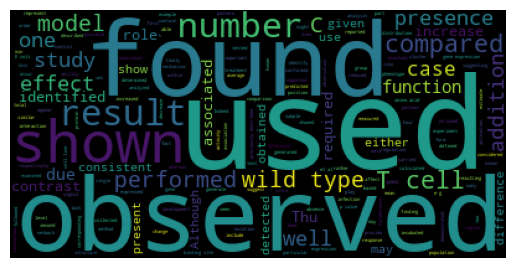

[('used', 192971),
 ('observed', 125548),
 ('found', 123781),
 ('shown', 110827),
 ('result', 101601),
 ('number', 92995),
 ('compared', 86908),
 ('T cell', 86129),
 ('wild type', 84695),
 ('performed', 84163),
 ('model', 84156),
 ('study', 78772),
 ('C', 76800),
 ('presence', 76389),
 ('effect', 75909),
 ('well', 73170),
 ('one', 71378),
 ('addition', 71333),
 ('case', 65302),
 ('function', 65040),
 ('due', 59725),
 ('identified', 58945),
 ('required', 58496),
 ('role', 57679),
 ('increase', 56075),
 ('contrast', 55396),
 ('Thu', 55136),
 ('associated', 54487),
 ('consistent', 53923),
 ('obtained', 53388),
 ('use', 52516),
 ('show', 52502),
 ('may', 52253),
 ('either', 51641),
 ('detected', 51510),
 ('Although', 51467),
 ('difference', 50604),
 ('present', 50560),
 ('given', 49750),
 ('gene expression', 49413),
 ('absence', 48466),
 ('known', 47883),
 ('described', 47555),
 ('similar', 47432),
 ('change', 46718),
 ('interaction', 46433),
 ('individual', 46257),
 ('min', 46219),
 ('wit

In [28]:
# WARNING: LONG PROCESS (a few minutes)
top_words_atc = make_word_cloud(df=train_df, text_col="article")
top_words_atc[:50]

Text counts =  24773


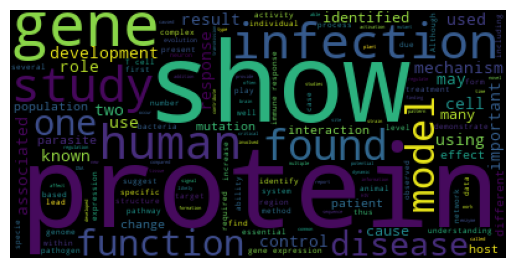

[('protein', 8642),
 ('show', 8141),
 ('gene', 8063),
 ('infection', 7485),
 ('study', 6996),
 ('human', 6819),
 ('found', 6709),
 ('model', 5878),
 ('function', 5734),
 ('one', 5711),
 ('disease', 4933),
 ('development', 4809),
 ('used', 4687),
 ('result', 4648),
 ('may', 4591),
 ('associated', 4585),
 ('using', 4386),
 ('known', 4367),
 ('mechanism', 4348),
 ('two', 4086),
 ('control', 3919),
 ('important', 3886),
 ('response', 3759),
 ('use', 3690),
 ('cell', 3652),
 ('role', 3631),
 ('identified', 3628),
 ('cause', 3515),
 ('many', 3506),
 ('interaction', 3476),
 ('host', 3445),
 ('mutation', 3384),
 ('change', 3379),
 ('patient', 3376),
 ('effect', 3367),
 ('parasite', 3348),
 ('different', 3291),
 ('population', 3287),
 ('understanding', 3246),
 ('activity', 3159),
 ('within', 3153),
 ('T cell', 3099),
 ('thus', 3086),
 ('level', 3071),
 ('individual', 3046),
 ('gene expression', 3040),
 ('specific', 3012),
 ('demonstrate', 2901),
 ('expression', 2880),
 ('region', 2870)]

In [29]:
top_words_summ = make_word_cloud(df=train_df, text_col="lay_summary")
top_words_summ[:50]